In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter
from scipy import signal
import math
import numpy as np

/var/folders/qx/dv5zms194lj0k025kmnl22jh0000gn/T/ipykernel_24776/3226477053.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def read_data(file):
        data = pd.read_csv(file)
        data=data.dropna()
        data=data.rename(columns= {'ax': 'AccelerationX', 'ay': 'AccelerationY', 'az': 'AccelerationZ', 'atotal': 'NetAcceleration'})
        data = data[ (data['time'] >= 10) & (data['time'] <= 80) ]
        return data

In [3]:
data = read_data('Data/Male-1-right-hand.csv')
data

,time,AccelerationX,AccelerationY,AccelerationZ,NetAcceleration
992,10.013857,-0.31,-0.90,-1.13,1.47
993,10.016249,-0.33,-0.84,-1.17,1.47
994,10.026328,-0.35,-0.80,-1.17,1.45
995,10.038723,-0.42,-0.79,-1.21,1.50
996,10.046585,-0.60,-0.87,-1.29,1.66
...,...,...,...,...,...
7930,79.952736,0.56,-1.41,-1.18,1.92
7931,79.960708,-0.08,-1.15,-2.87,3.09
7932,79.970775,-0.37,-0.86,-3.87,3.98
7933,79.989731,-0.38,-0.72,-4.21,4.28


In [12]:
# With Fraction = 0.02
x_loess1= lowess(data['AccelerationX'], data['time'], frac=0.02 )

# With Fraction = 0.07
x_loess= lowess(data['AccelerationX'], data['time'], frac=0.07 )
y_loess= lowess(data['AccelerationY'], data['time'], frac=0.07 )
z_loess= lowess(data['AccelerationZ'], data['time'], frac=0.07 )

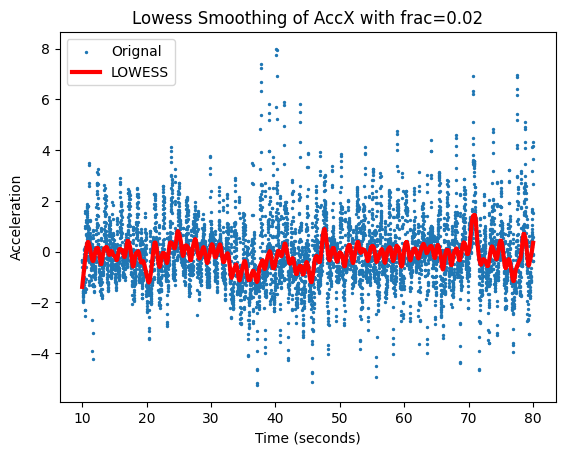

In [13]:
# Scatter Plot with frac = 0.02
plt.scatter(data['time'],data['AccelerationX'], s=2,label='Orignal')
plt.plot(x_loess[:,0], x_loess1[:, 1], 'r-', linewidth=2, label='LOWESS')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration')
plt.title('Lowess Smoothing of AccX with frac=0.02')
plt.savefig("Lowess1(0.02).jpg")
plt.show();

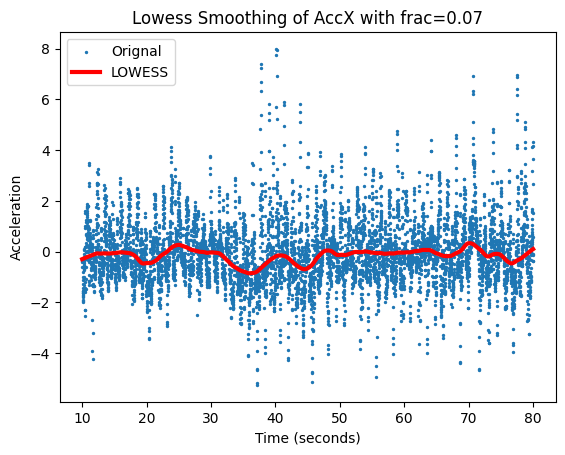

In [15]:
# Scatter Plot with frac = 0.07
plt.scatter(data['time'],data['AccelerationX'], s=2,label='Orignal')
plt.plot(x_loess[:,0], x_loess[:, 1], 'r-', linewidth=2, label='LOWESS')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration')
plt.title('Lowess Smoothing of AccX with frac=0.07')
plt.savefig("Lowess1(0.07).jpg")
plt.show();

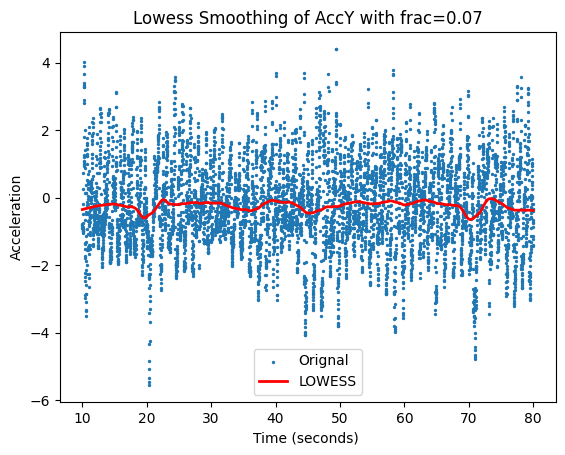

In [18]:
plt.scatter(data['time'],data['AccelerationY'], s=2,label='Orignal')
plt.plot(y_loess[:,0], y_loess[:, 1], 'r-', linewidth=2, label='LOWESS')
plt.legend()
plt.xlabel('Time (seconds) ')
plt.ylabel('Acceleration')
plt.title('Lowess Smoothing of AccY with frac=0.07');

In [19]:
plt.scatter(data['time'],data['AccelerationZ'], s=1,label='Orignal')
plt.plot(z_loess[:,0], z_loess[:, 1], 'r-', linewidth=3, label='LOWESS')
plt.legend()
plt.xlabel('Time (seconds) ')
plt.ylabel('Acceleration')
plt.title('Lowess Smoothing of AccZ with frac=0.7');

KeyError: 'Accz'